In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

#### Client_data Analysis First 

In [2]:
cdf = pd.read_csv('client_data.csv')

In [3]:
cdf.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
cdf.shape

(14606, 26)

In [6]:
cdf['id'].value_counts().value_counts()

1    14606
Name: id, dtype: int64

In [7]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]

In [8]:
for i in date:
    cdf[i] = pd.to_datetime(cdf[i])

In [9]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [10]:
cdf.duplicated().sum()

0

In [11]:
cdf.isnull().sum().sum()

0

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
cdf.drop(['channel_sales', 'origin_up'], axis=1, inplace= True)

In [14]:
cdf.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,13.856,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,19.800,0


In [15]:
cdf.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [16]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   cons_12m                        14606 non-null  int64         
 2   cons_gas_12m                    14606 non-null  int64         
 3   cons_last_month                 14606 non-null  int64         
 4   date_activ                      14606 non-null  datetime64[ns]
 5   date_end                        14606 non-null  datetime64[ns]
 6   date_modif_prod                 14606 non-null  datetime64[ns]
 7   date_renewal                    14606 non-null  datetime64[ns]
 8   forecast_cons_12m               14606 non-null  float64       
 9   forecast_cons_year              14606 non-null  int64         
 10  forecast_discount_energy        14606 non-null  float64       
 11  fo

In [17]:
X= cdf.drop('id', axis = 1)
y= cdf['id']

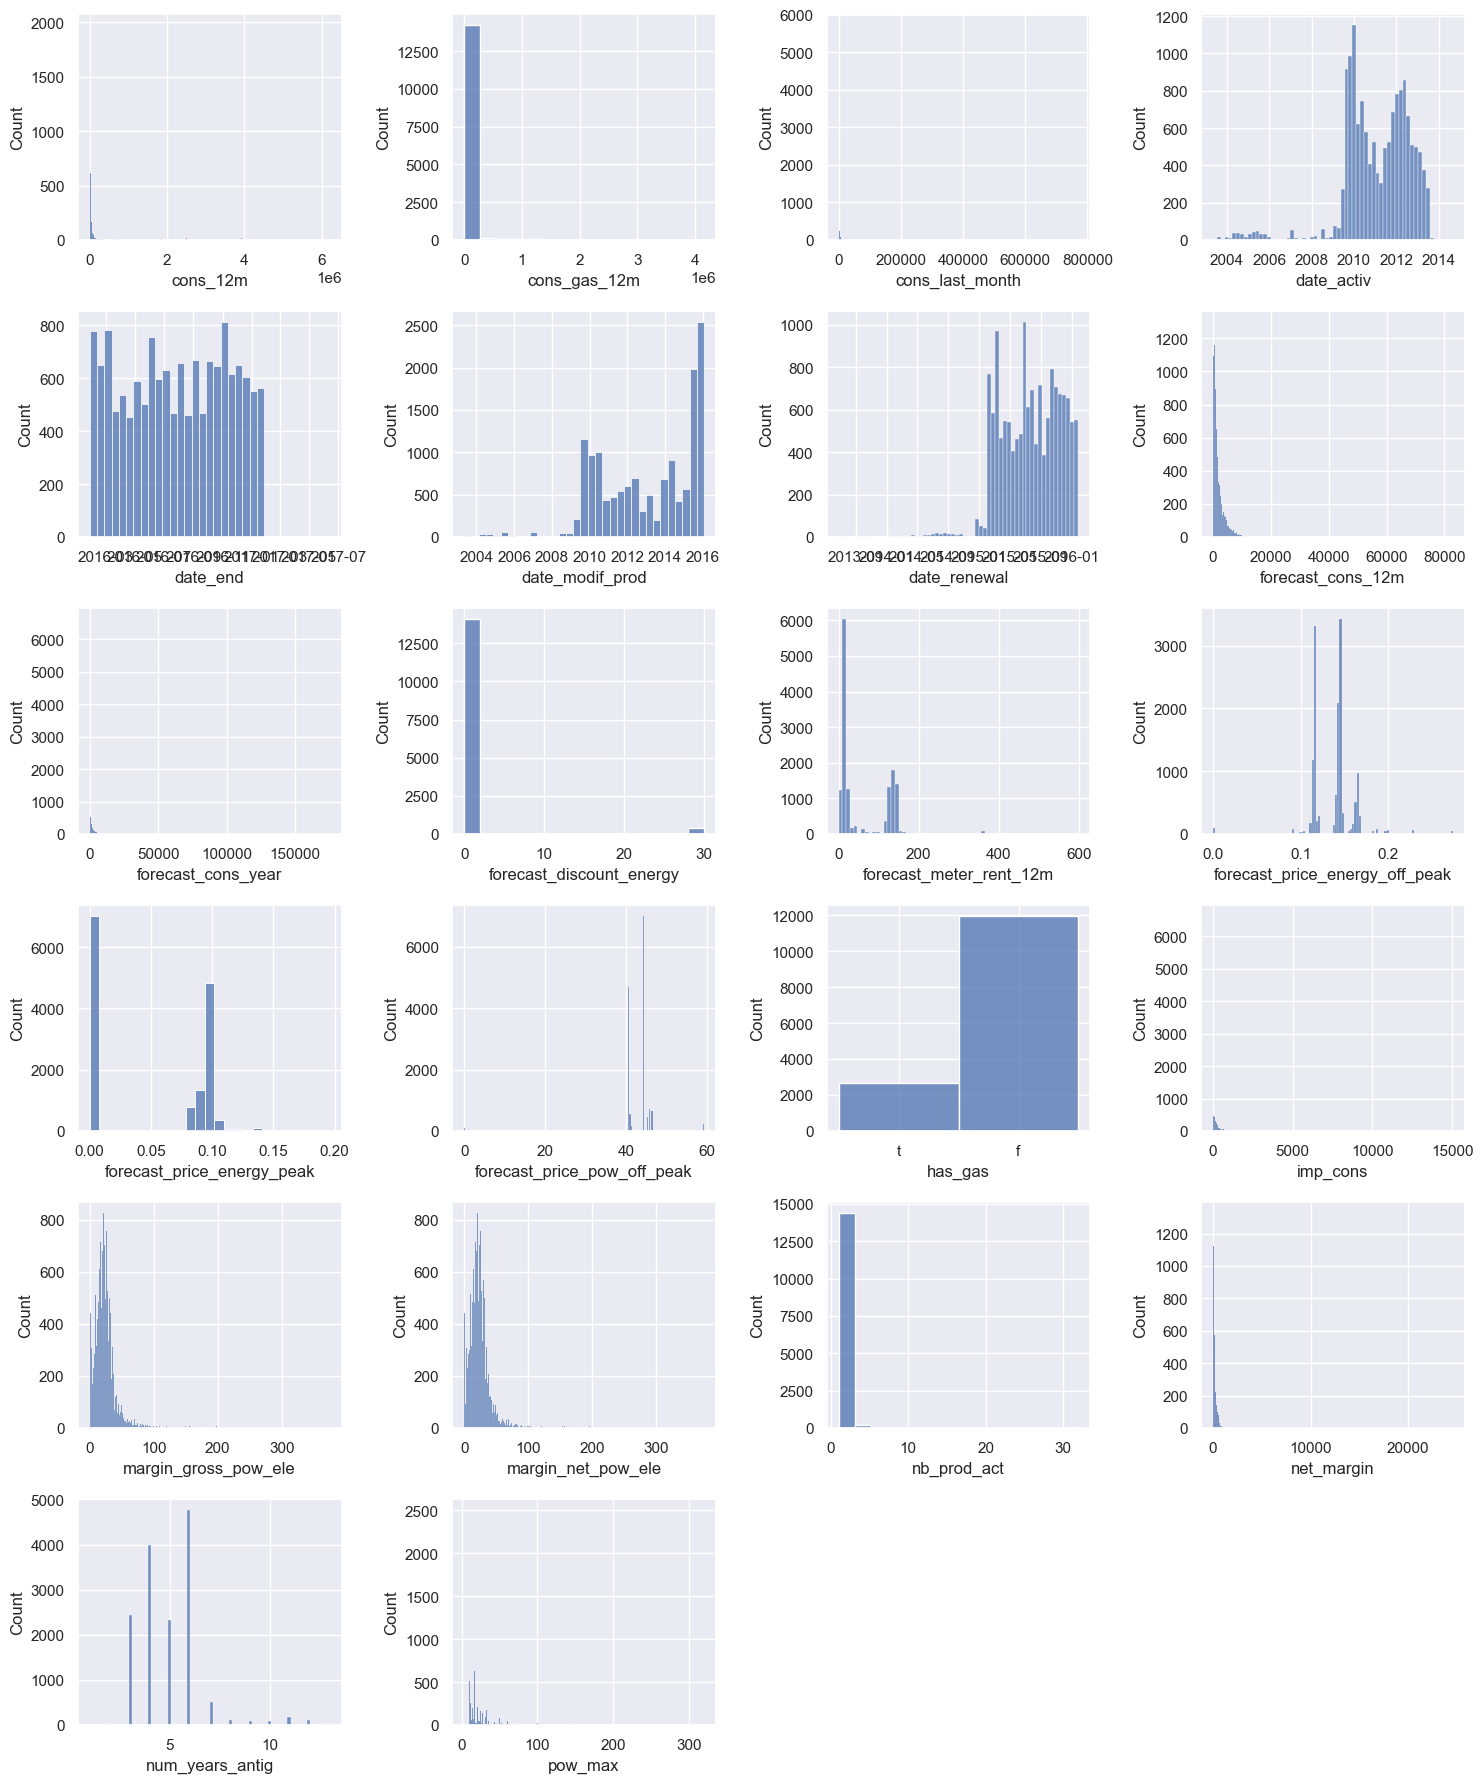

In [18]:
plt.figure(figsize=(15,18))
for i in range(22):
    plt.subplot(6,4,i+1)
    sns.histplot(X.iloc[:,i])
plt.tight_layout()
plt.show();

In [19]:
cdf= pd.concat([X, y], axis=1)

In [20]:
cdf.head()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,id
0,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,43.648,1,24011ae4ebbe3035111d65fa7c15bc57
1,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,13.800,0,d29c2c54acc38ff3c0614d0a653813dd
2,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,13.856,0,764c75f661154dac3a6c254cd082ea7d
3,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,13.200,0,bba03439a292a1e166f80264c16191cb
4,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,19.800,0,149d57cf92fc41cf94415803a877cb4b


In [21]:
# Reorder columns to have "id" as the first column
cdf = cdf[['id'] + [col for col in cdf.columns if col != 'id']]

cdf.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,13.800,0


Looking at each variable, and the effects of churn on each of them separately.

Observing so many columns, we can group certain columns into many groups to make it comprehensive and easy to understand.
Consumption, Forecast, Margin and Others. 

#### Observing Churn Variable first.

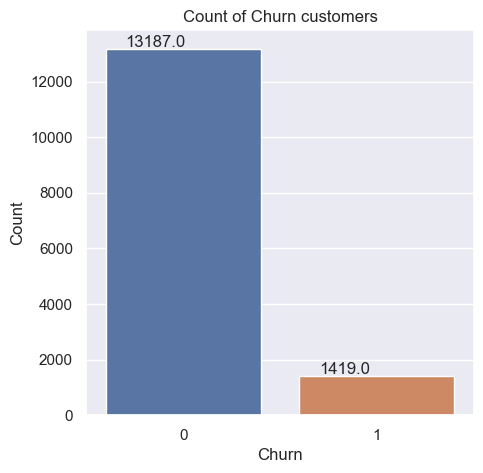

In [22]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="churn", data=cdf, order=[0,1])
plt.title('Count of Churn customers')
plt.xlabel('Churn')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [23]:
consumption = cdf[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

In [24]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

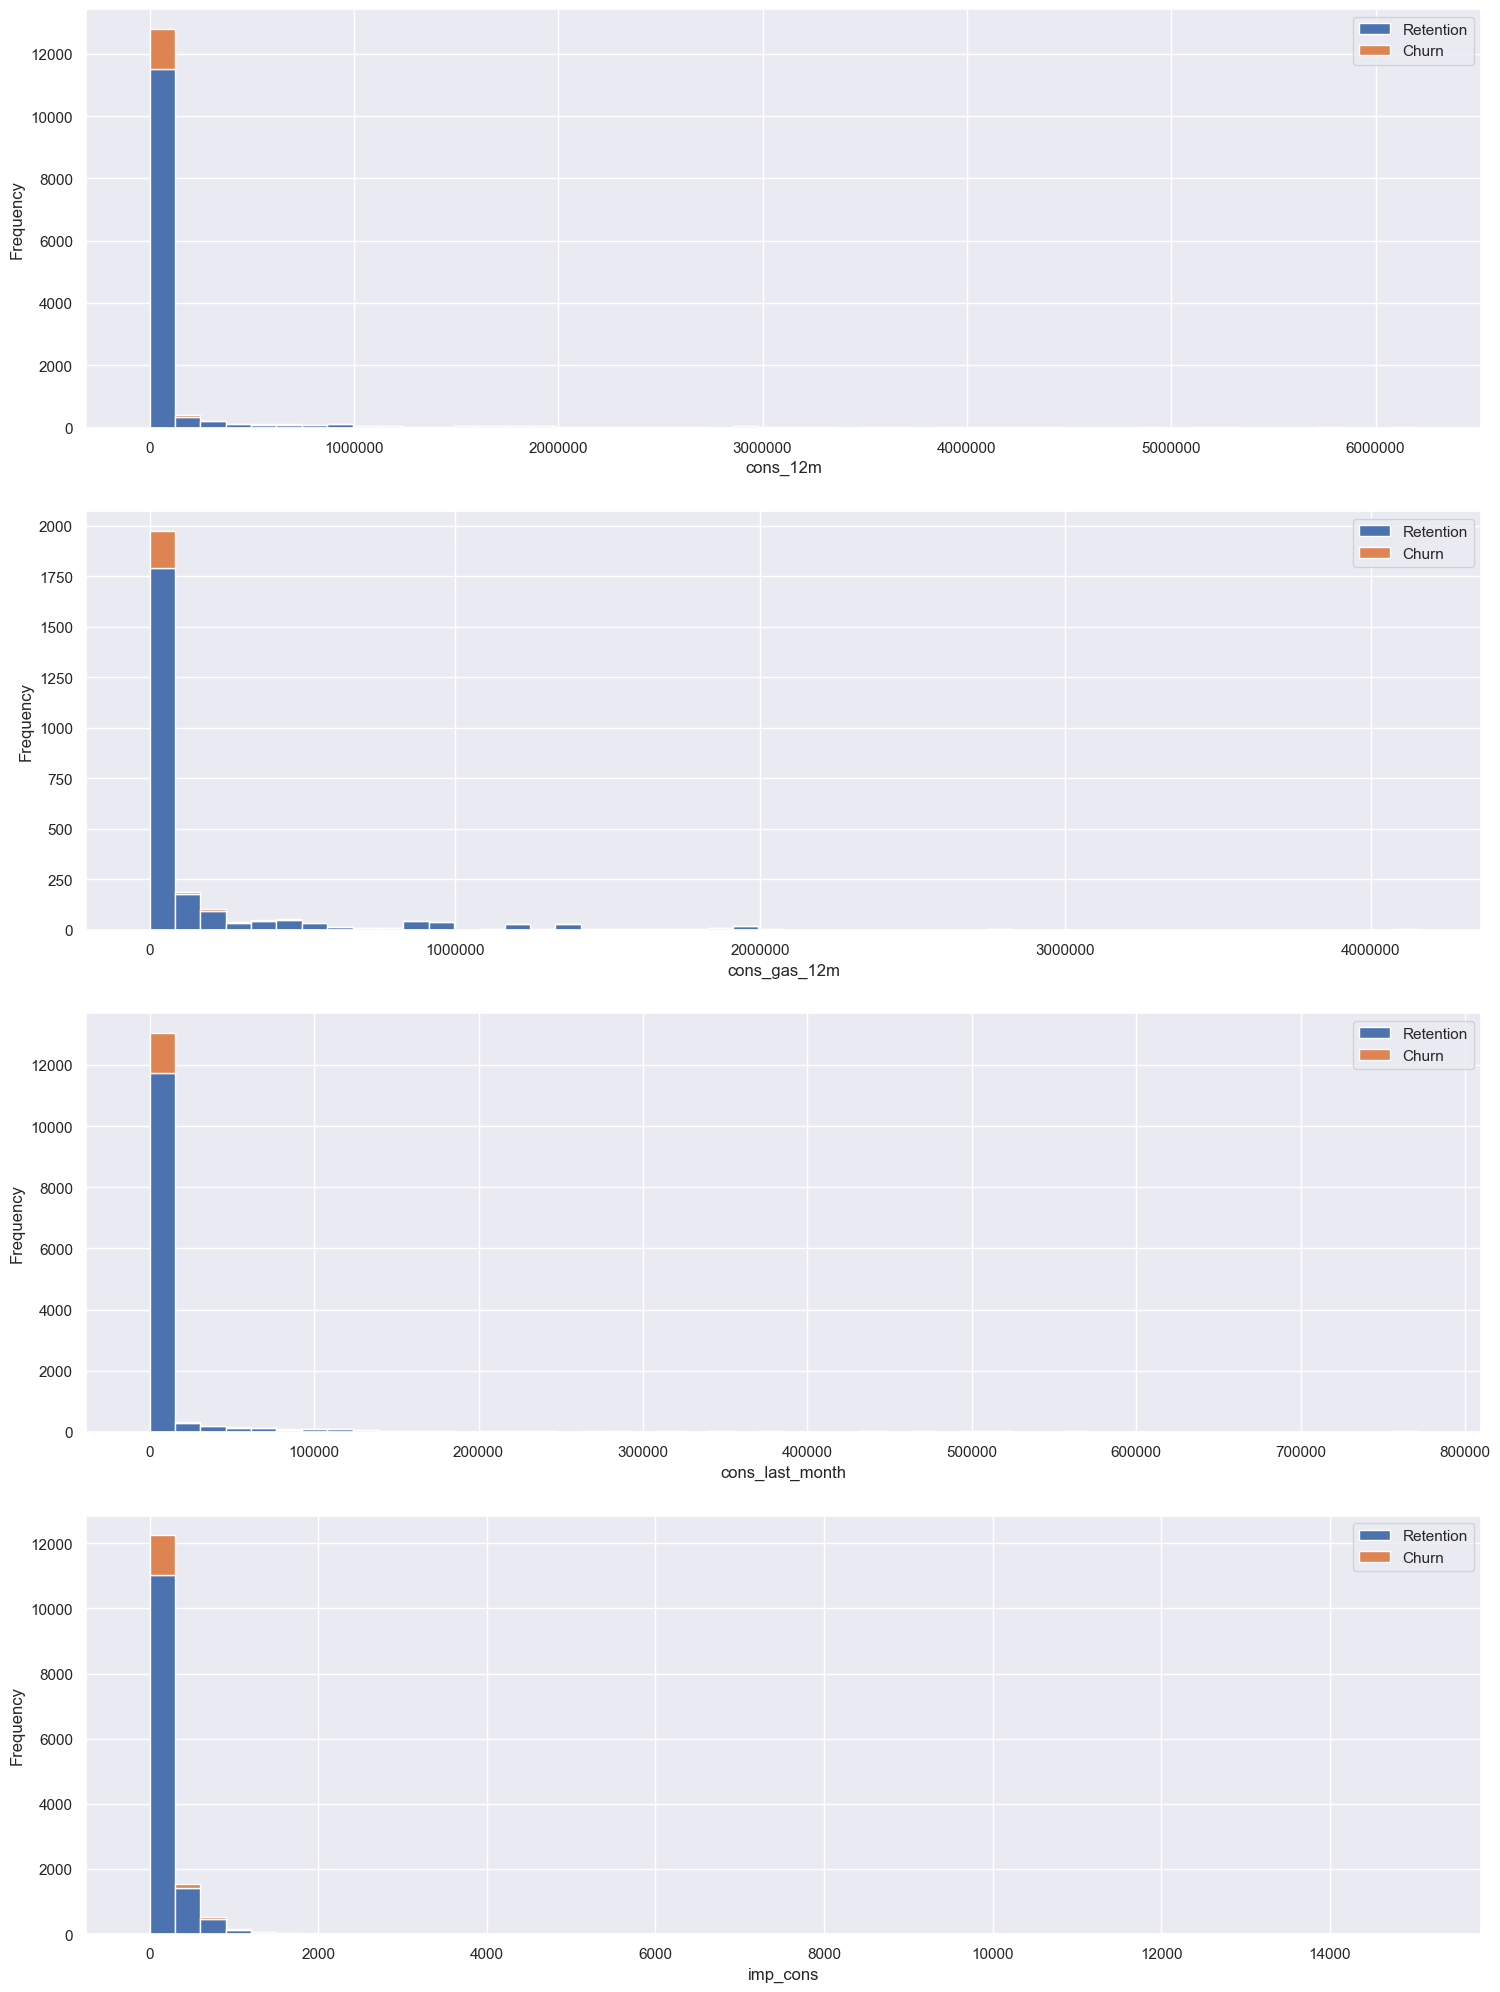

In [25]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

In [26]:
plot_distribution(consumption[consumption['has_gas'] == 'f'], 'cons_gas_12m', axs[1])

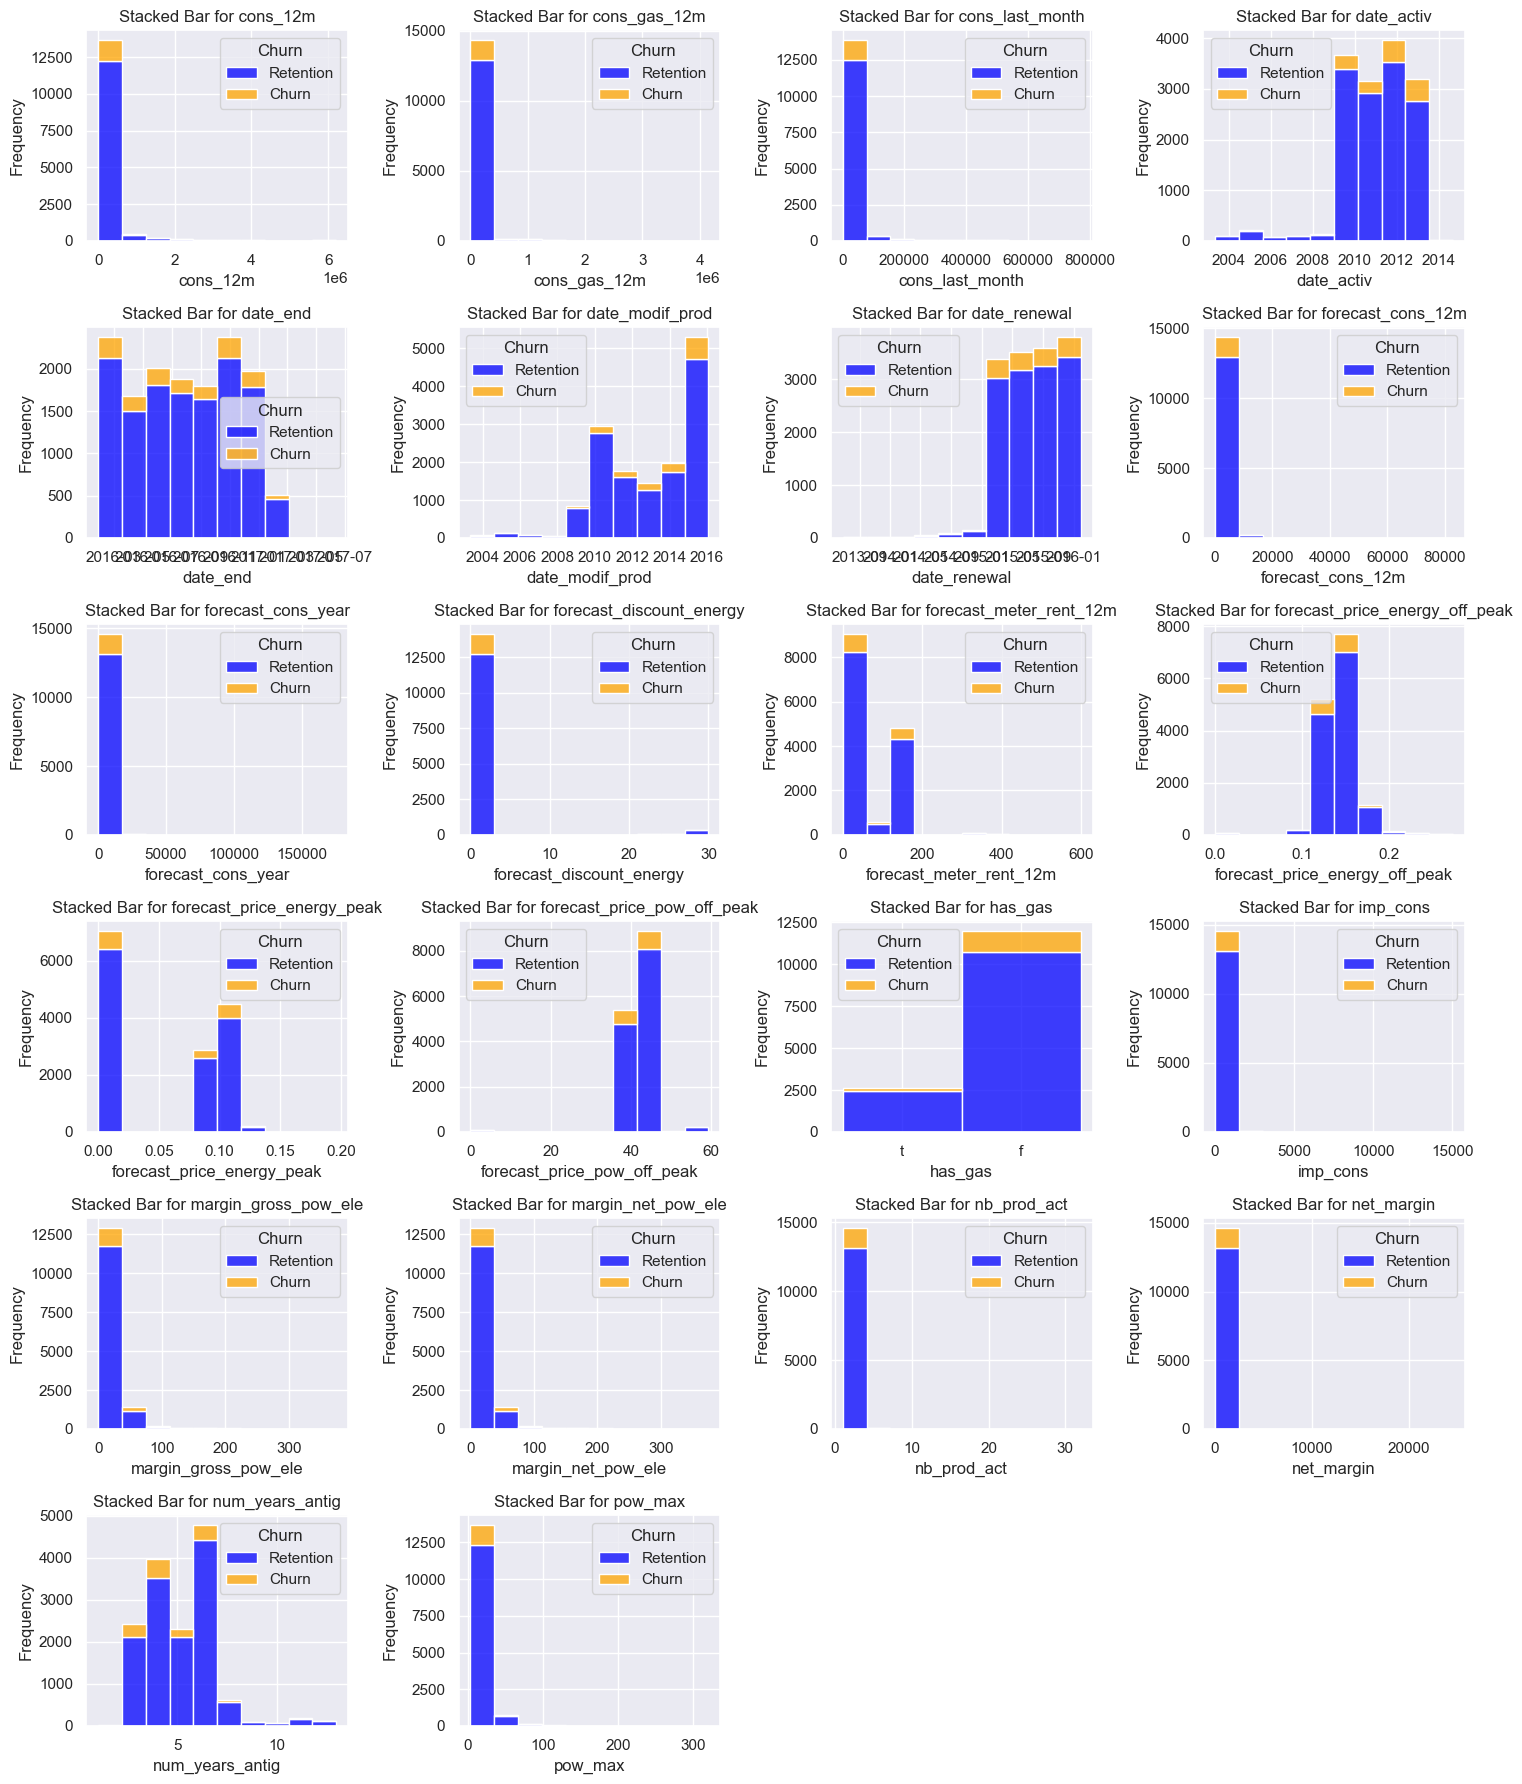

In [27]:
plt.figure(figsize=(15, 18))
for i, feature in enumerate(X.columns[:-1]):  # Exclude the 'Churn' column
    plt.subplot(6, 4, i + 1)
    
    # Create a custom palette to reverse the default colors
    custom_palette = {0: 'blue', 1: 'orange'}
    sns.histplot(data=X, x=feature, hue='churn', multiple= 'stack', bins=10, hue_order=[1, 0], palette= custom_palette)
    
    plt.title(f'Stacked Bar for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Churn', labels=['Retention', 'Churn'])
    
plt.tight_layout()
plt.show();

#### Forecast 

In [28]:
forecast = cdf[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

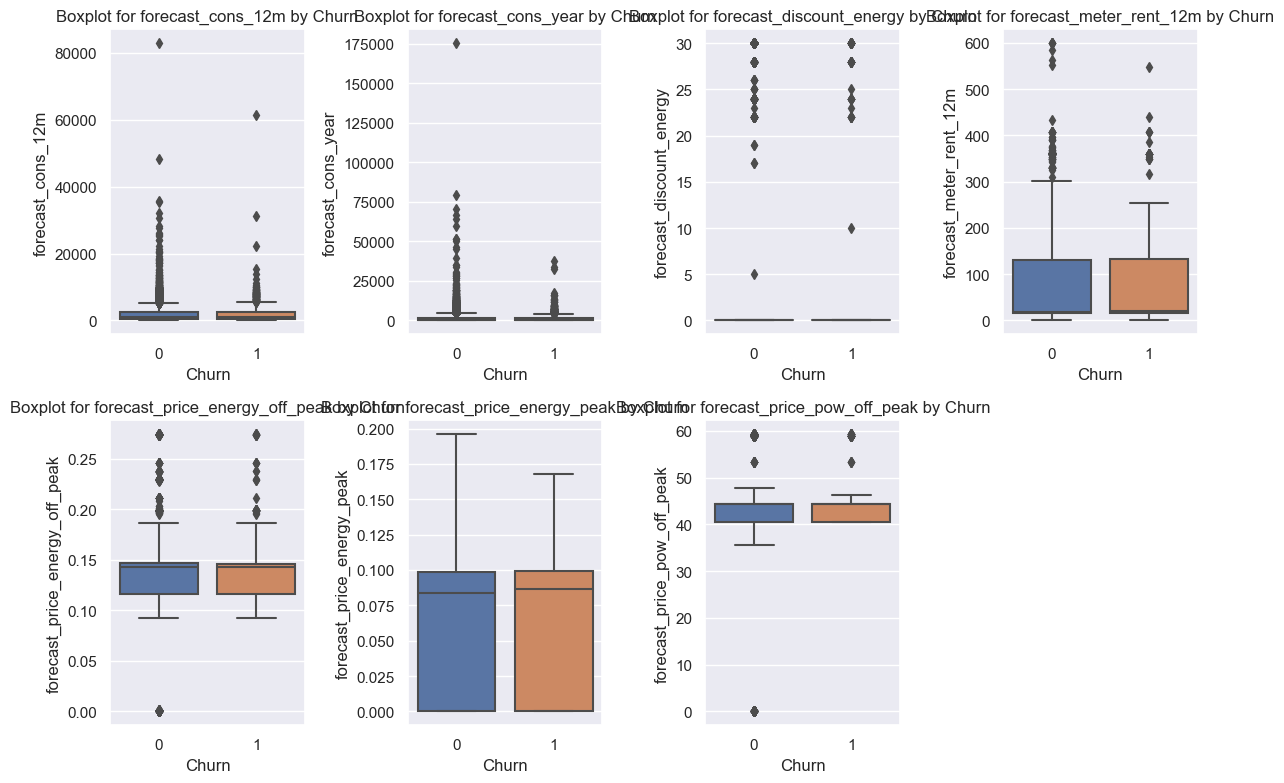

In [29]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(forecast.columns):
    plt.subplot(2, 4, i + 1)
    
    sns.boxplot(data=forecast, x=cdf['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

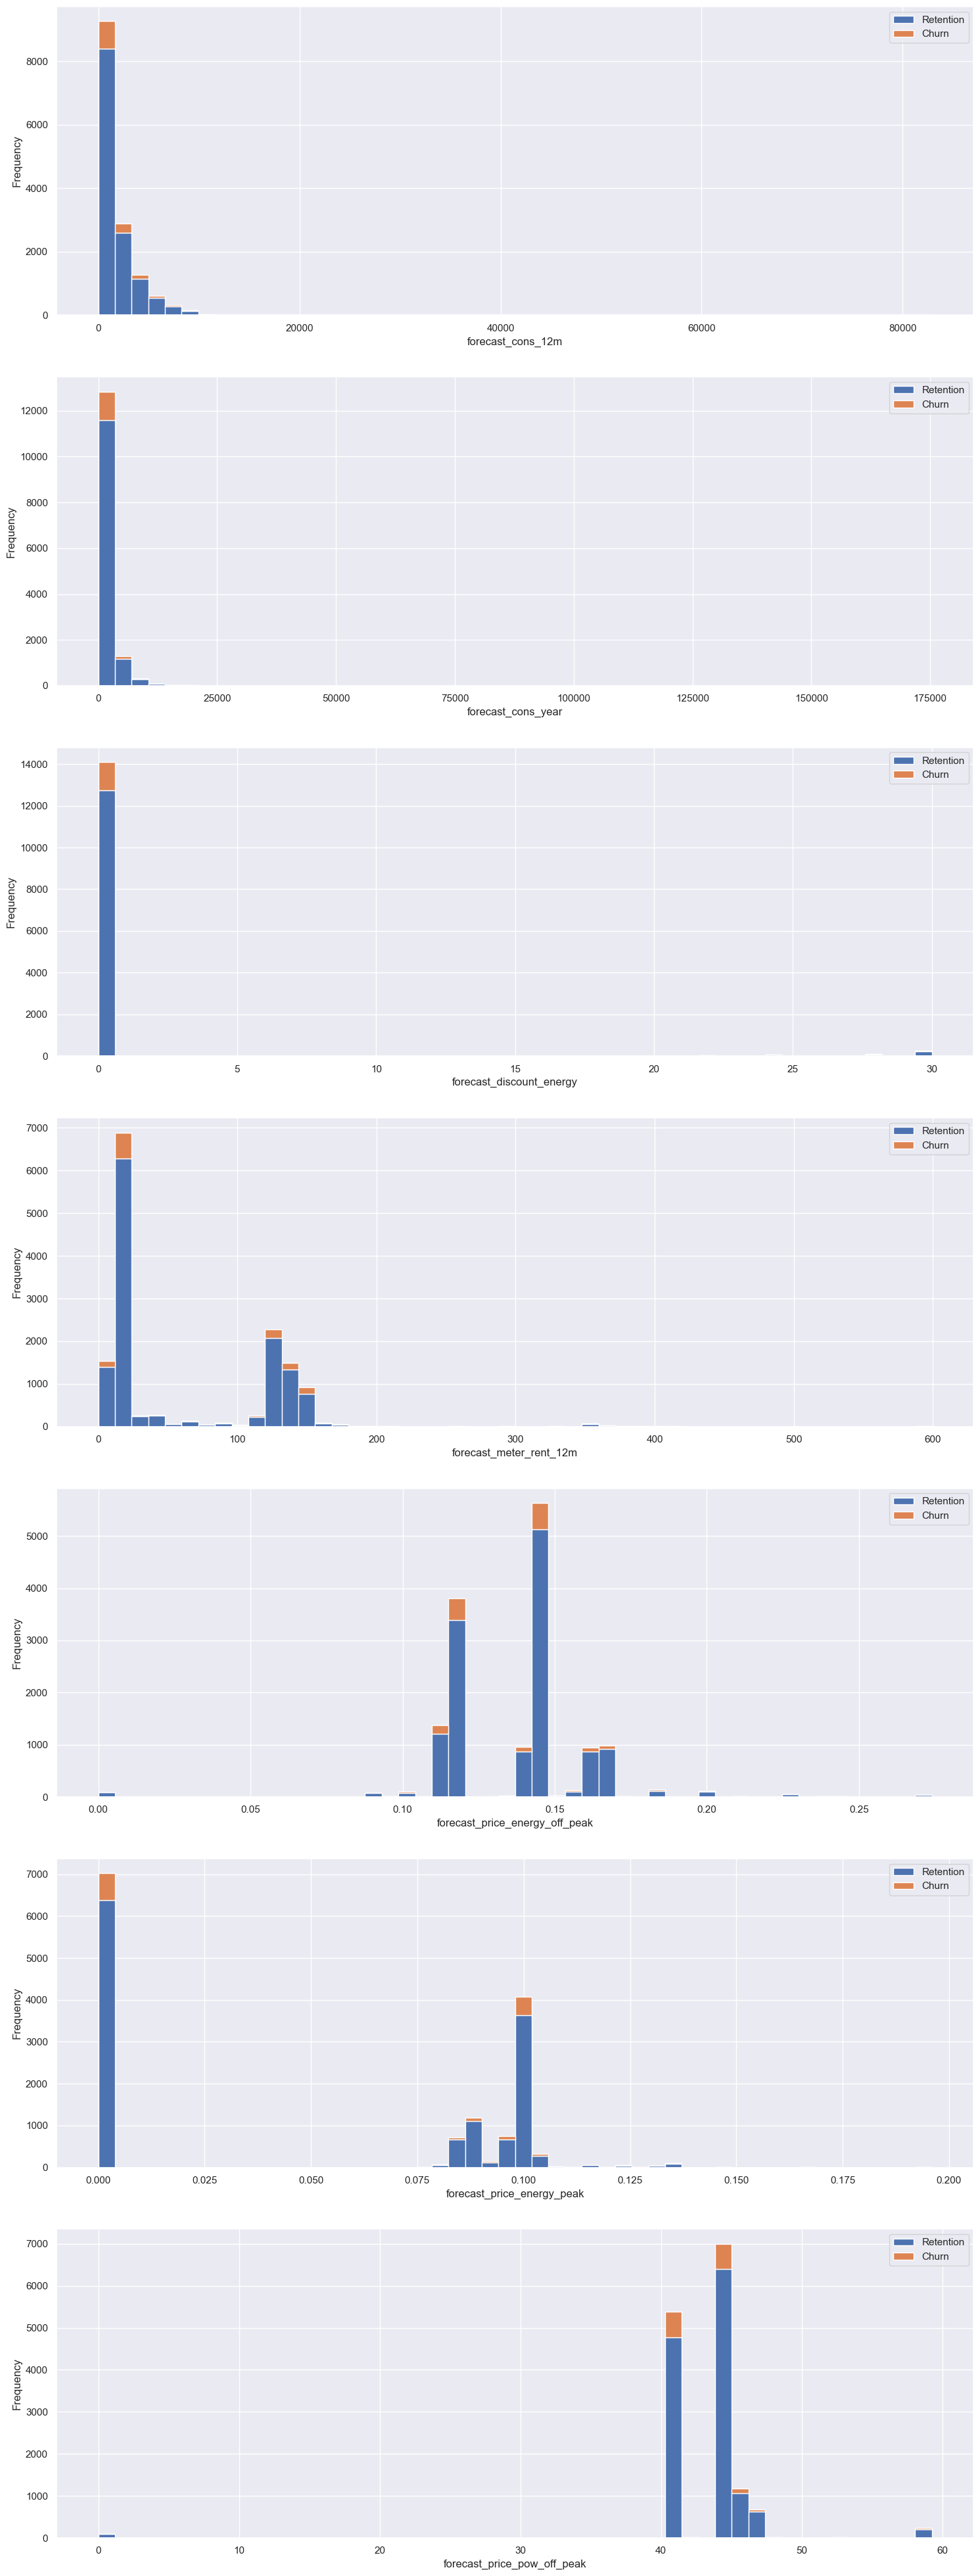

In [30]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(cdf, "forecast_cons_12m", axs[0])
plot_distribution(cdf, "forecast_cons_year", axs[1])
plot_distribution(cdf, "forecast_discount_energy", axs[2])
plot_distribution(cdf, "forecast_meter_rent_12m", axs[3])
plot_distribution(cdf, "forecast_price_energy_off_peak", axs[4])
plot_distribution(cdf, "forecast_price_energy_peak", axs[5])
plot_distribution(cdf, "forecast_price_pow_off_peak", axs[6])

In [31]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

#### Contract

In [32]:
contract_type = cdf[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

Text(0.5, 1.0, 'Contract Type')

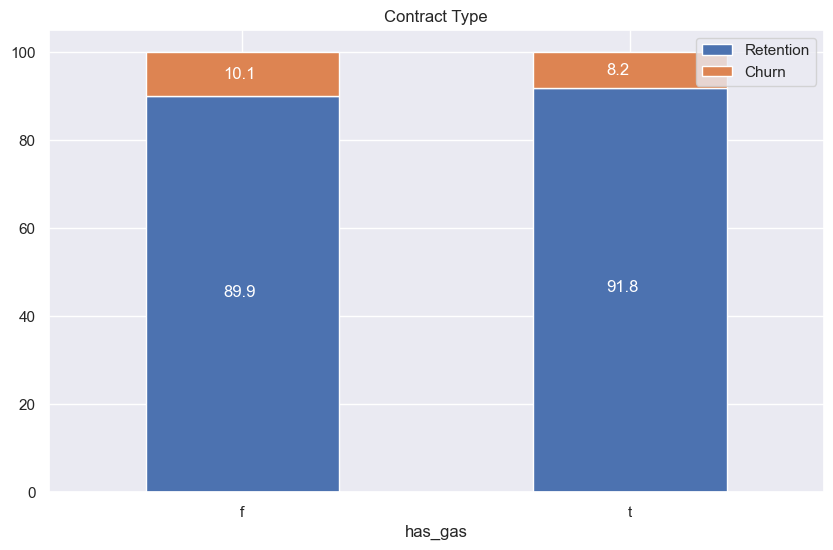

In [33]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(10,6),rot=0)
annotate_stacked_bars(ax, textsize=12)
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

#### Margins

In [34]:
margin = cdf[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

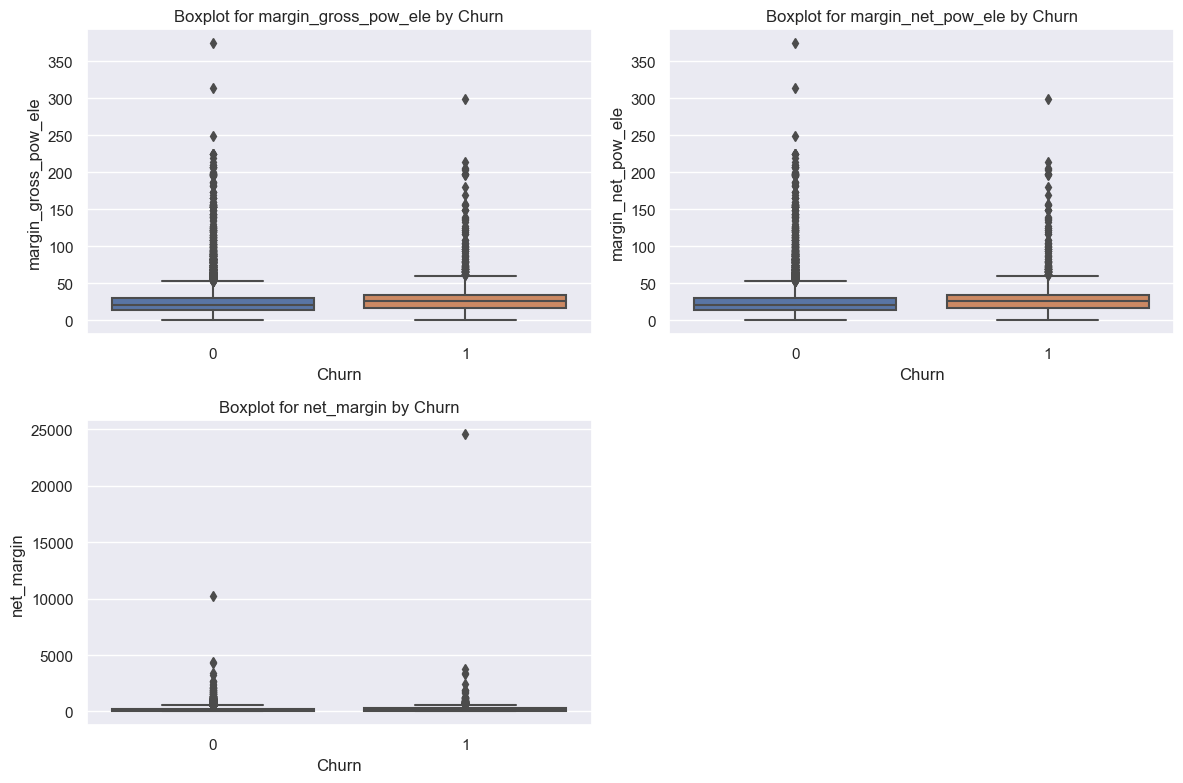

In [35]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(margin.columns):
    plt.subplot(2, 2, i + 1)
    
    sns.boxplot(data=margin, x=cdf['churn'], y=column)
    
    plt.title(f'Boxplot for {column} by Churn')
    plt.xlabel("Churn")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show();

#### Subscribed Power

In [36]:
power = cdf[["id", "pow_max", "churn"]]

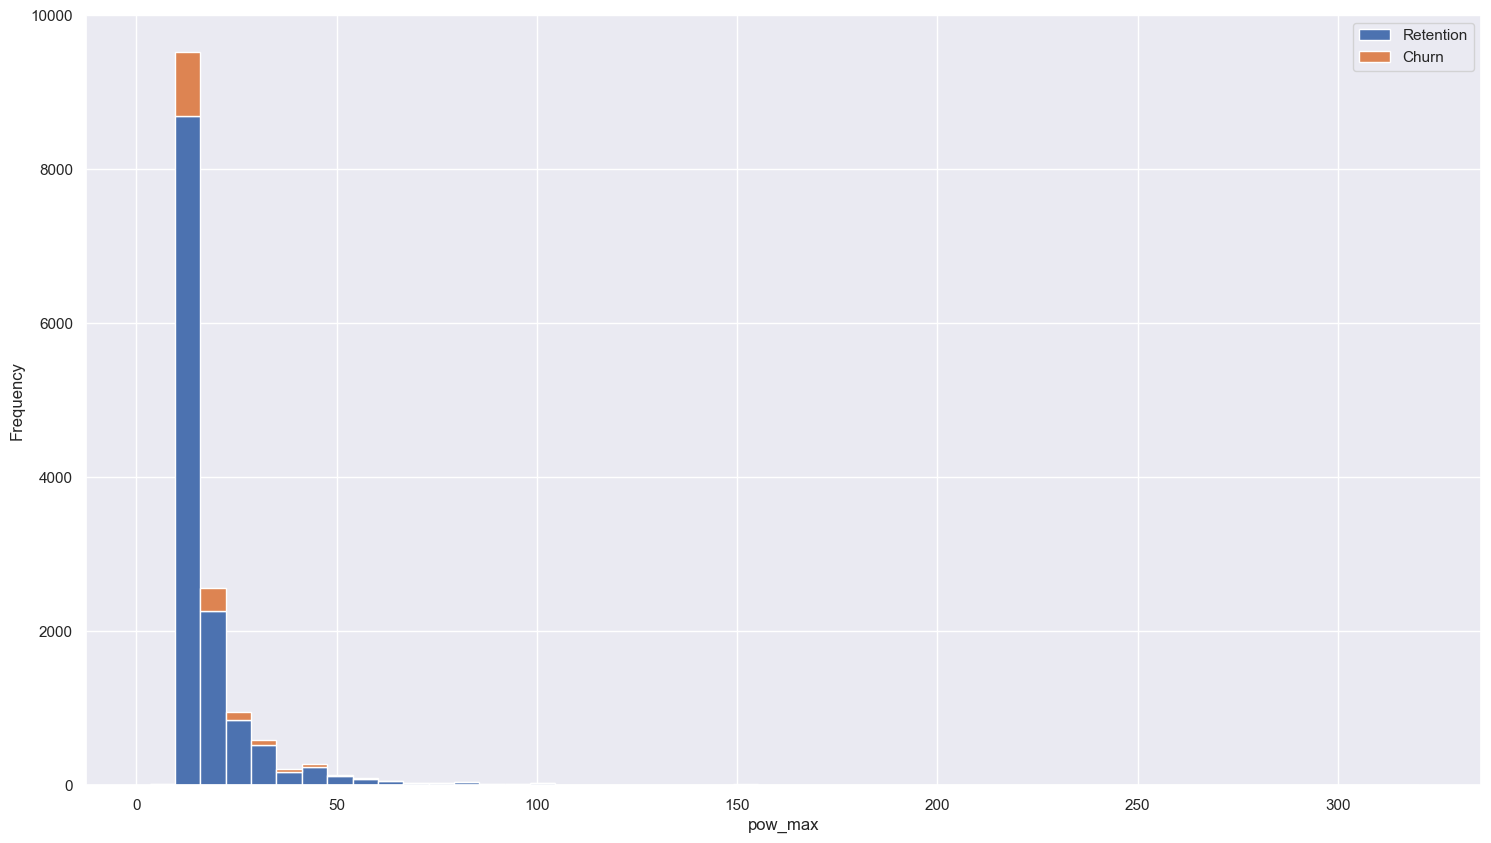

In [37]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

#### Other columns

In [38]:
other_cols = cdf[['id', 'nb_prod_act', 'num_years_antig','churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

C:\Users\honey\AppData\Local\Temp\ipykernel_16136\3581205114.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cdf.corr(), cmap='bwr',annot = True)


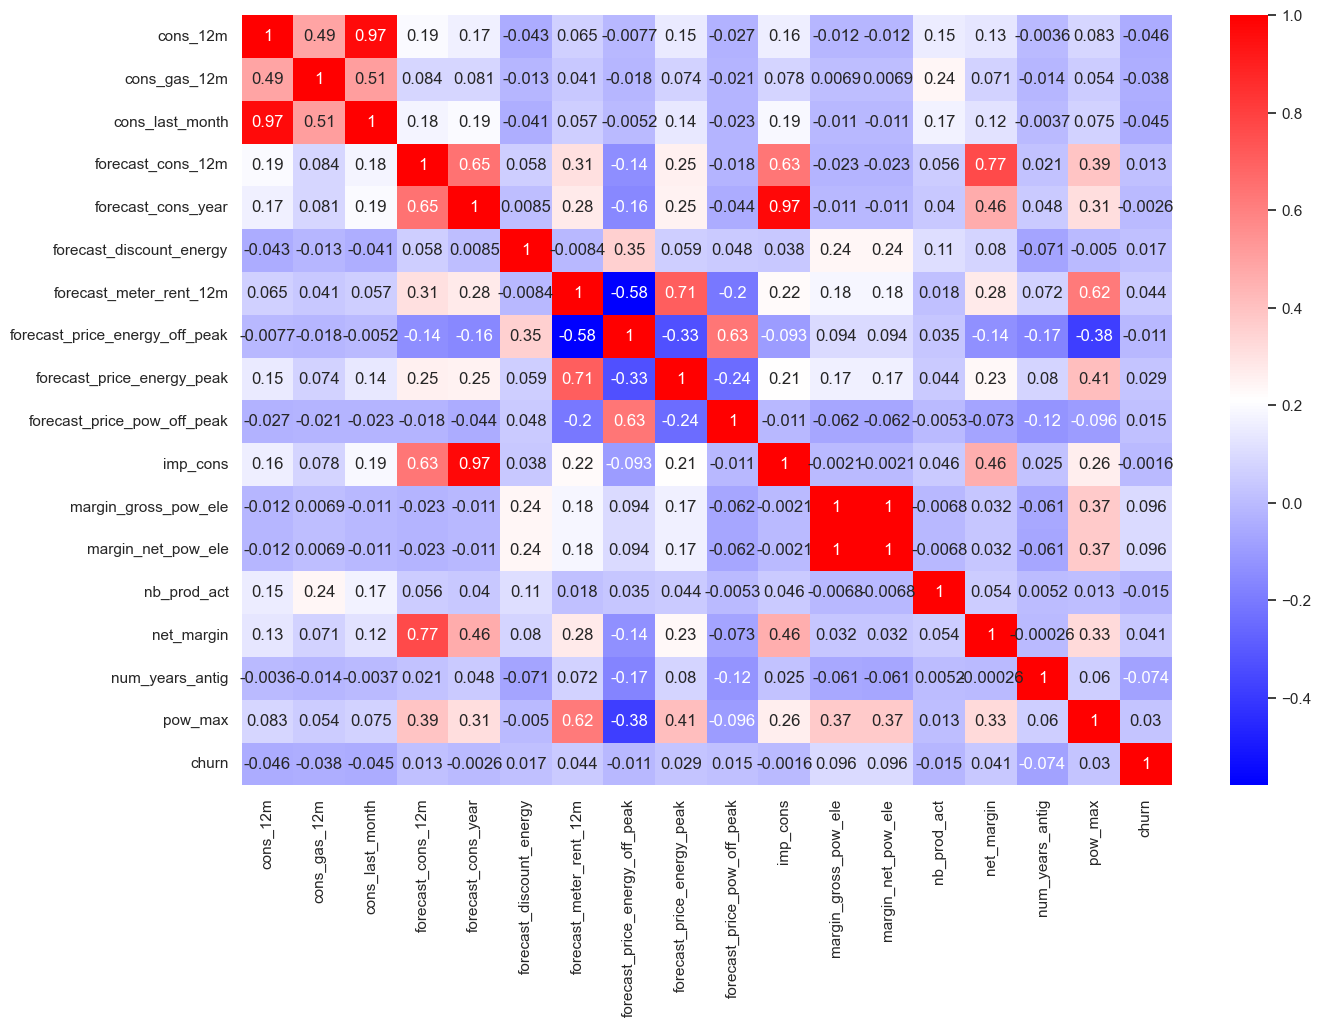

In [39]:
#Correlation analysis using Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(cdf.corr(), cmap='bwr',annot = True)
plt.show();

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
# Calculate the correlation matrix for your DataFrame
correlation_matrix = cdf.corr()

# Stack the correlation matrix to create a Series with a MultiIndex
correlation_series = correlation_matrix.stack()

# Reset the index to turn the MultiIndex into columns
correlation_df = correlation_series.reset_index()

# Rename the columns for clarity
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter the DataFrame to include values from 1.00 to 0.50
correlation_filtered = correlation_df[(correlation_df['Correlation'] <= 0.99) & (correlation_df['Correlation'] >= 0.50)]

# Sort the DataFrame in descending order by correlation values
correlation_filtered_sorted = correlation_filtered.sort_values(by='Correlation', ascending=False)

# Define a function to map correlation values to colors
def color_map(val):
    color = sns.color_palette("coolwarm", as_cmap=True)(val)
    return f'background-color: rgb{tuple(np.round(np.array(color) * 255))}'

# Apply the color mapping function to the 'Correlation' column
styled_correlation_df = correlation_filtered_sorted.style.applymap(color_map, subset=['Correlation'])

# Display the styled DataFrame with colored correlation values
styled_correlation_df

C:\Users\honey\AppData\Local\Temp\ipykernel_16136\2850443582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cdf.corr()


,Variable 1,Variable 2,Correlation
82,forecast_cons_year,imp_cons,0.969395
184,imp_cons,forecast_cons_year,0.969395
2,cons_12m,cons_last_month,0.968212
36,cons_last_month,cons_12m,0.968212
255,net_margin,forecast_cons_12m,0.768537
68,forecast_cons_12m,net_margin,0.768537
150,forecast_price_energy_peak,forecast_meter_rent_12m,0.706376
116,forecast_meter_rent_12m,forecast_price_energy_peak,0.706376
75,forecast_cons_year,forecast_cons_12m,0.647727
58,forecast_cons_12m,forecast_cons_year,0.647727


In [42]:
Corr_mat= pd.DataFrame(correlation_filtered_sorted)
Corr_mat

,Variable 1,Variable 2,Correlation
82,forecast_cons_year,imp_cons,0.969395
184,imp_cons,forecast_cons_year,0.969395
2,cons_12m,cons_last_month,0.968212
36,cons_last_month,cons_12m,0.968212
255,net_margin,forecast_cons_12m,0.768537
68,forecast_cons_12m,net_margin,0.768537
150,forecast_price_energy_peak,forecast_meter_rent_12m,0.706376
116,forecast_meter_rent_12m,forecast_price_energy_peak,0.706376
75,forecast_cons_year,forecast_cons_12m,0.647727
58,forecast_cons_12m,forecast_cons_year,0.647727


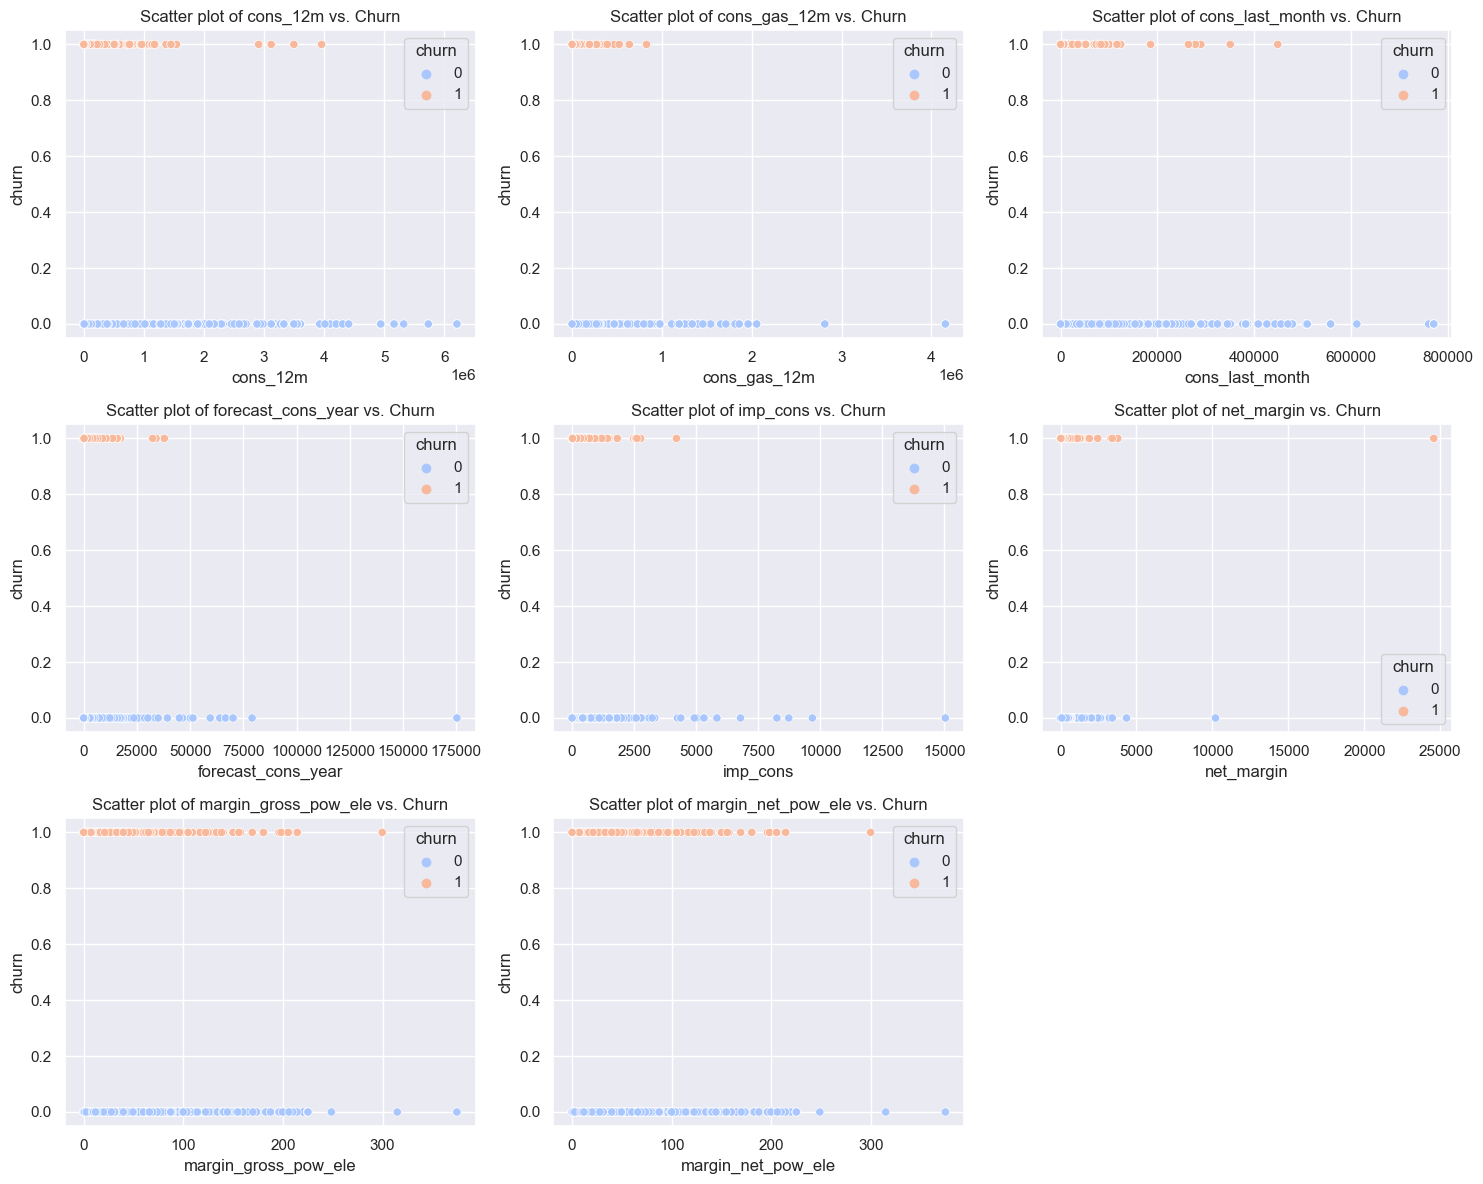

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected columns
selected_columns = ['cons_12m','cons_gas_12m','cons_last_month', 'forecast_cons_year', 'imp_cons', 'net_margin', 'margin_gross_pow_ele', 'margin_net_pow_ele']

# Set the figure size and initialize the subplot counter
plt.figure(figsize=(15, 12))
subplot_counter = 1

# Loop through the selected columns and create scatter plots with 'churn' as hue
for column_name in selected_columns:
    plt.subplot(3, 3, subplot_counter)
    sns.scatterplot(data=cdf, x=column_name, y='churn', hue='churn', palette='coolwarm')
    plt.title(f'Scatter plot of {column_name} vs. Churn')
    subplot_counter += 1

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show();

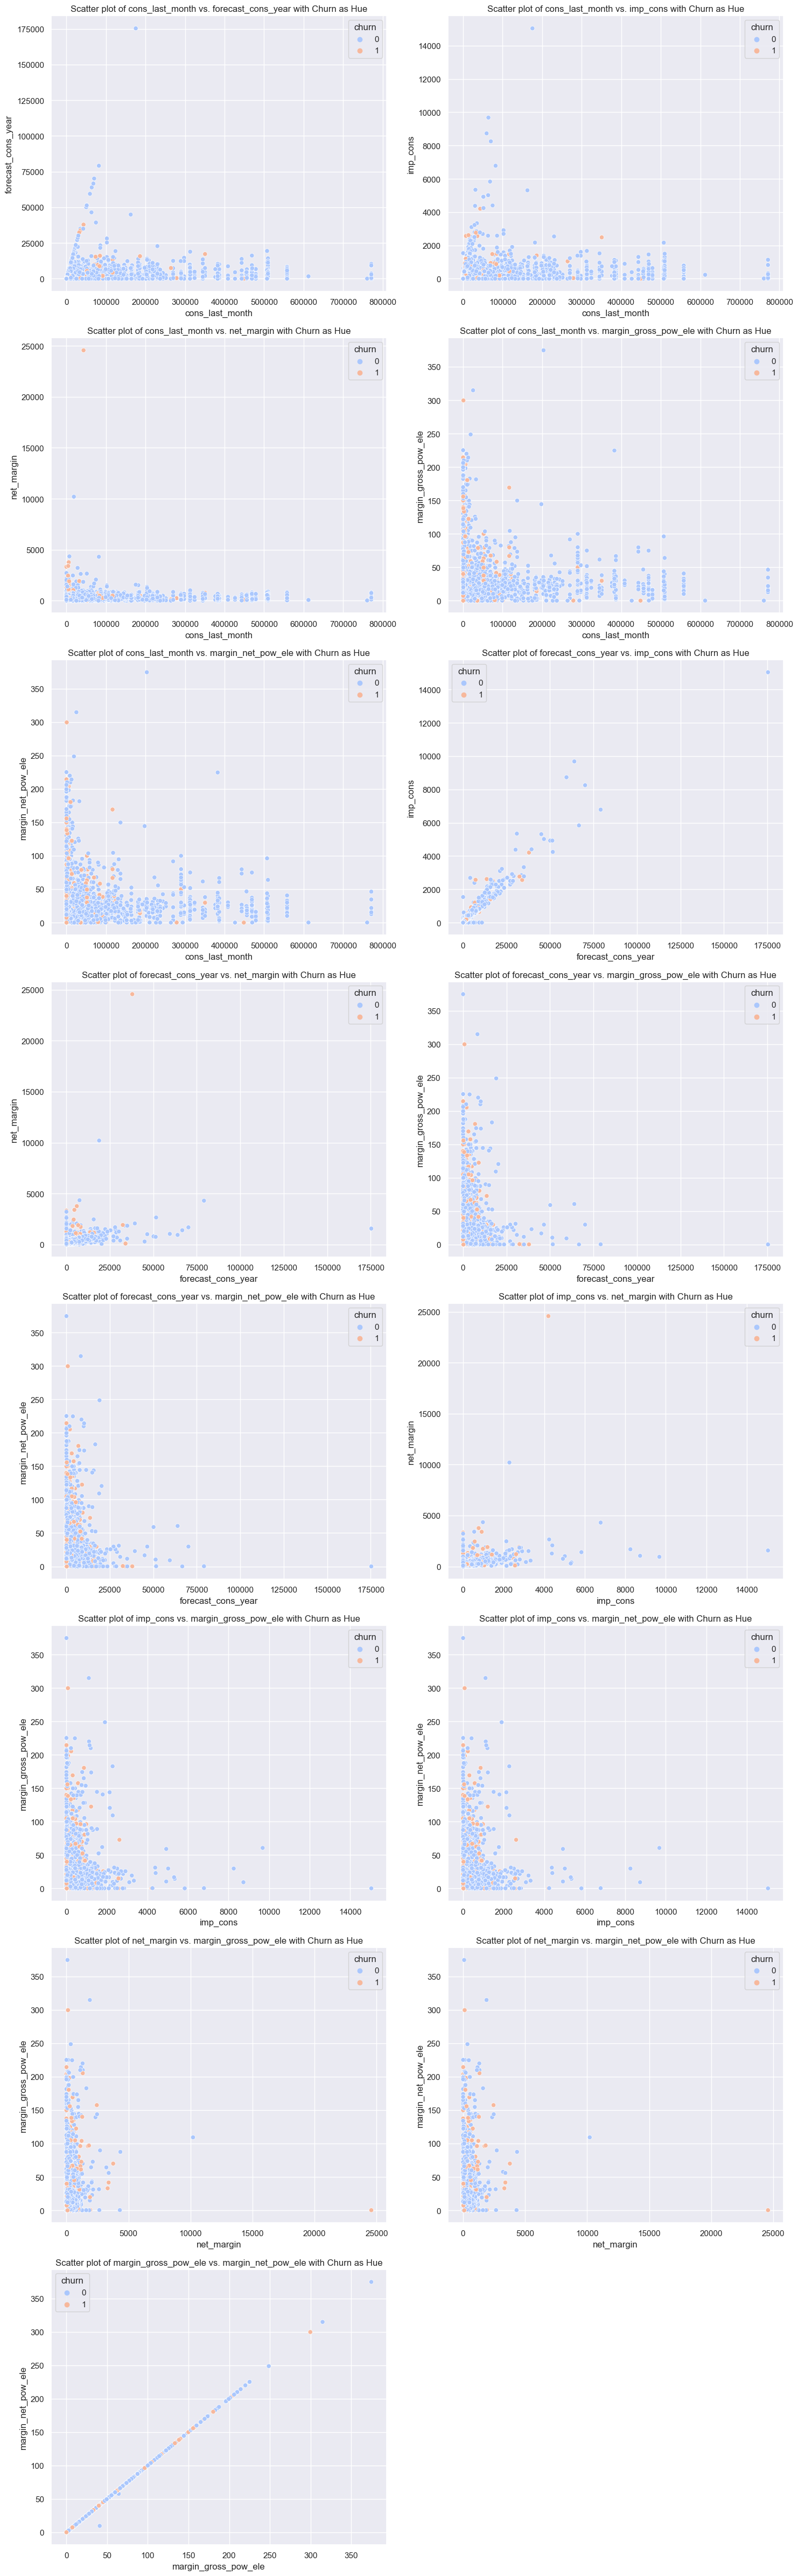

In [44]:
from itertools import combinations

# List of selected columns
selected_columns = ['cons_last_month', 'forecast_cons_year', 'imp_cons', 'net_margin', 'margin_gross_pow_ele', 'margin_net_pow_ele']

# Calculate the number of unique scatter plots (combinations)
num_plots = len(list(combinations(selected_columns, 2)))

# Determine the number of rows and columns for subplots
num_rows = (num_plots + 1) // 2  # Add 1 and use integer division to round up
num_cols = 2  # Two plots per row

# Set the figure size
plt.figure(figsize=(15, 6 * num_rows))

# Generate all unique pairs of columns
column_pairs = list(combinations(selected_columns, 2))

# Iterate through column pairs to create scatter plots
for i, (x_column, y_column) in enumerate(column_pairs):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=cdf, x=x_column, y=y_column, hue='churn', palette='coolwarm')
    
    plt.title(f'Scatter plot of {x_column} vs. {y_column} with Churn as Hue')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show();

#### Now let's observe dataset price_data.

In [46]:
pdf = pd.read_csv('price_data.csv')

In [47]:
pdf.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [48]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [49]:
pdf.shape

(193002, 8)

In [50]:
pdf.duplicated().sum()

0

In [51]:
pdf.isnull().sum().sum()

0

In [52]:
pdf["price_date"] = pd.to_datetime(pdf["price_date"])

In [53]:
pdf.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [54]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [55]:
pdf.shape

(193002, 8)

In [56]:
X = pdf.drop('id', axis=1)
y = pdf['id']

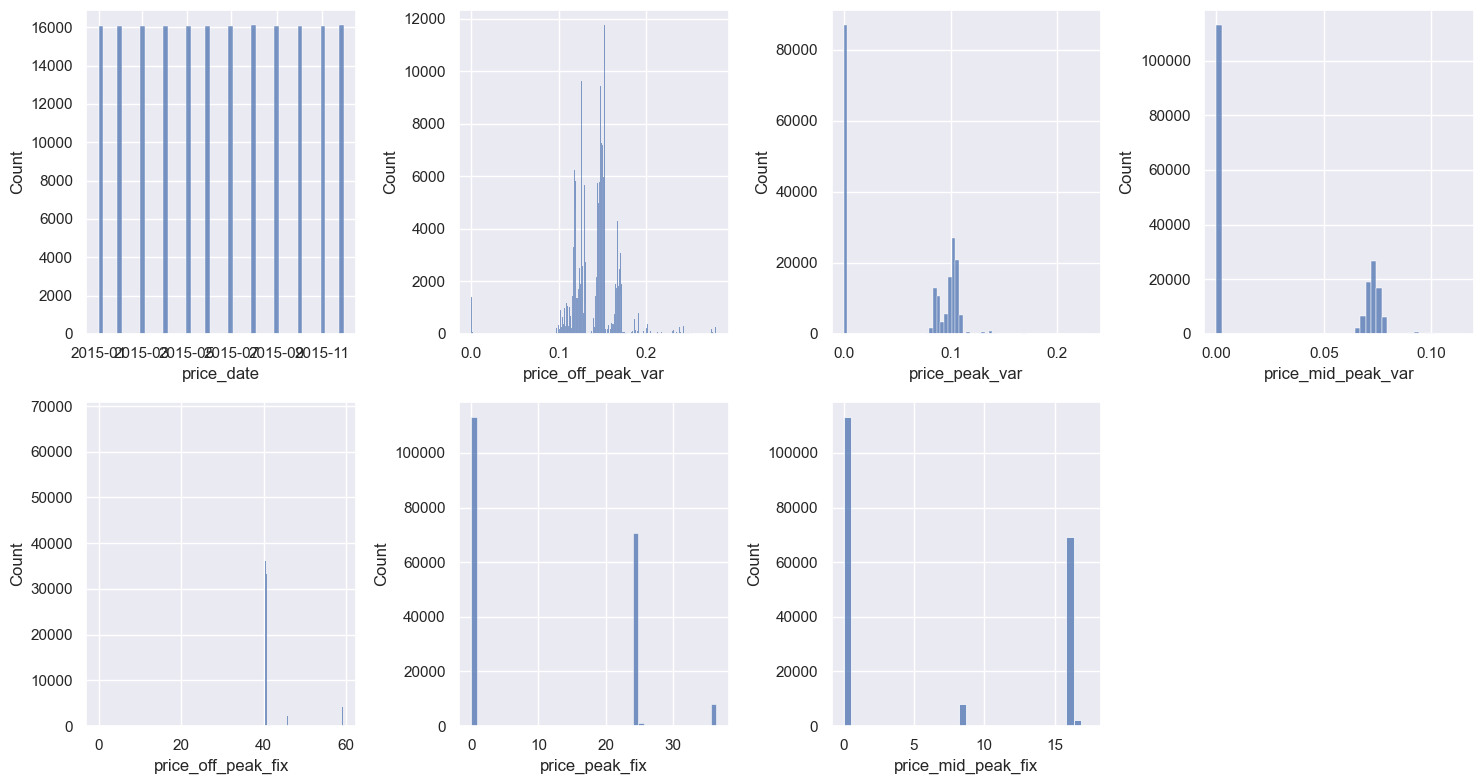

In [57]:
plt.figure(figsize=(15, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    sns.histplot(X.iloc[:, i])
plt.tight_layout()
plt.show();

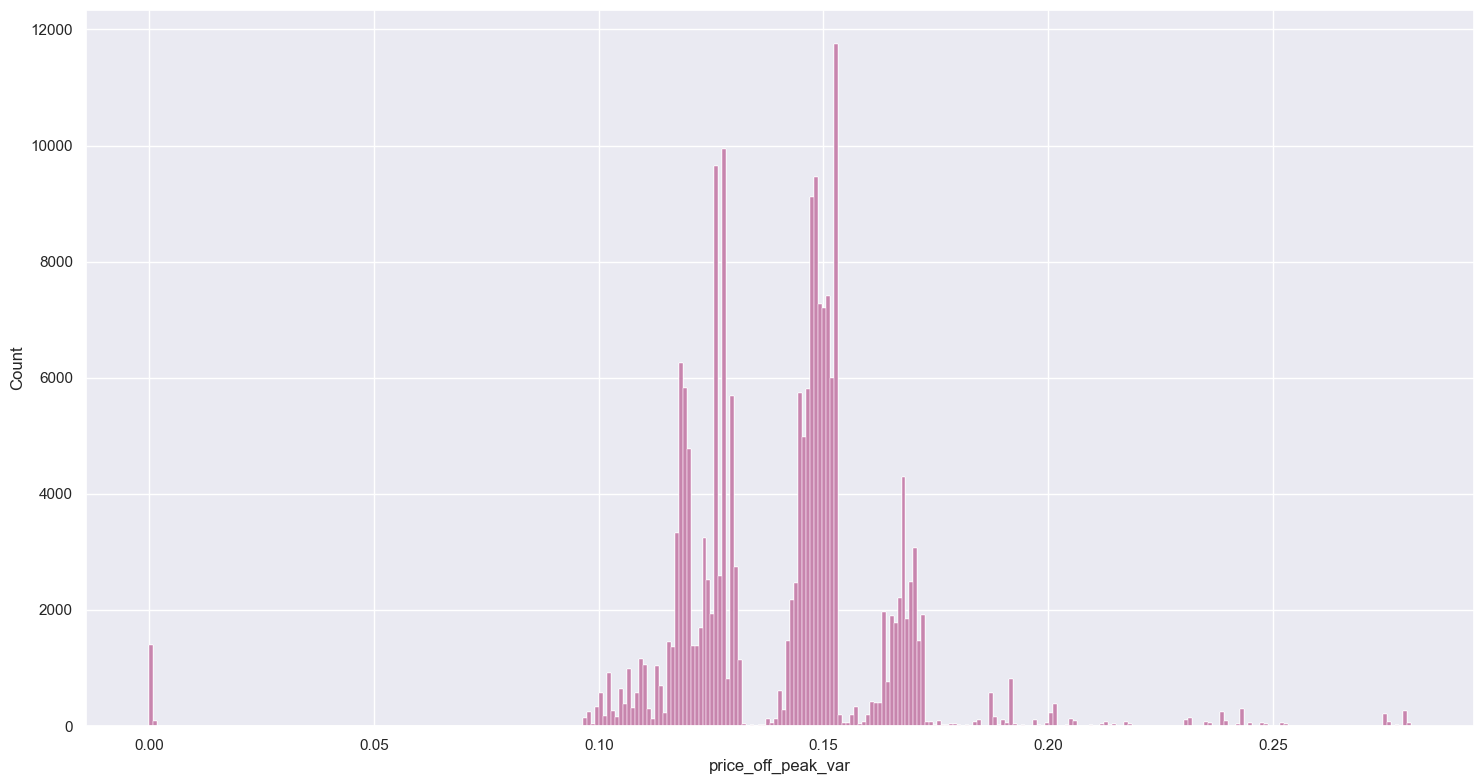

In [58]:
plt.figure(figsize=(15, 8))
for i in range(7):
    sns.histplot(X['price_off_peak_var'])
plt.tight_layout()
plt.show();

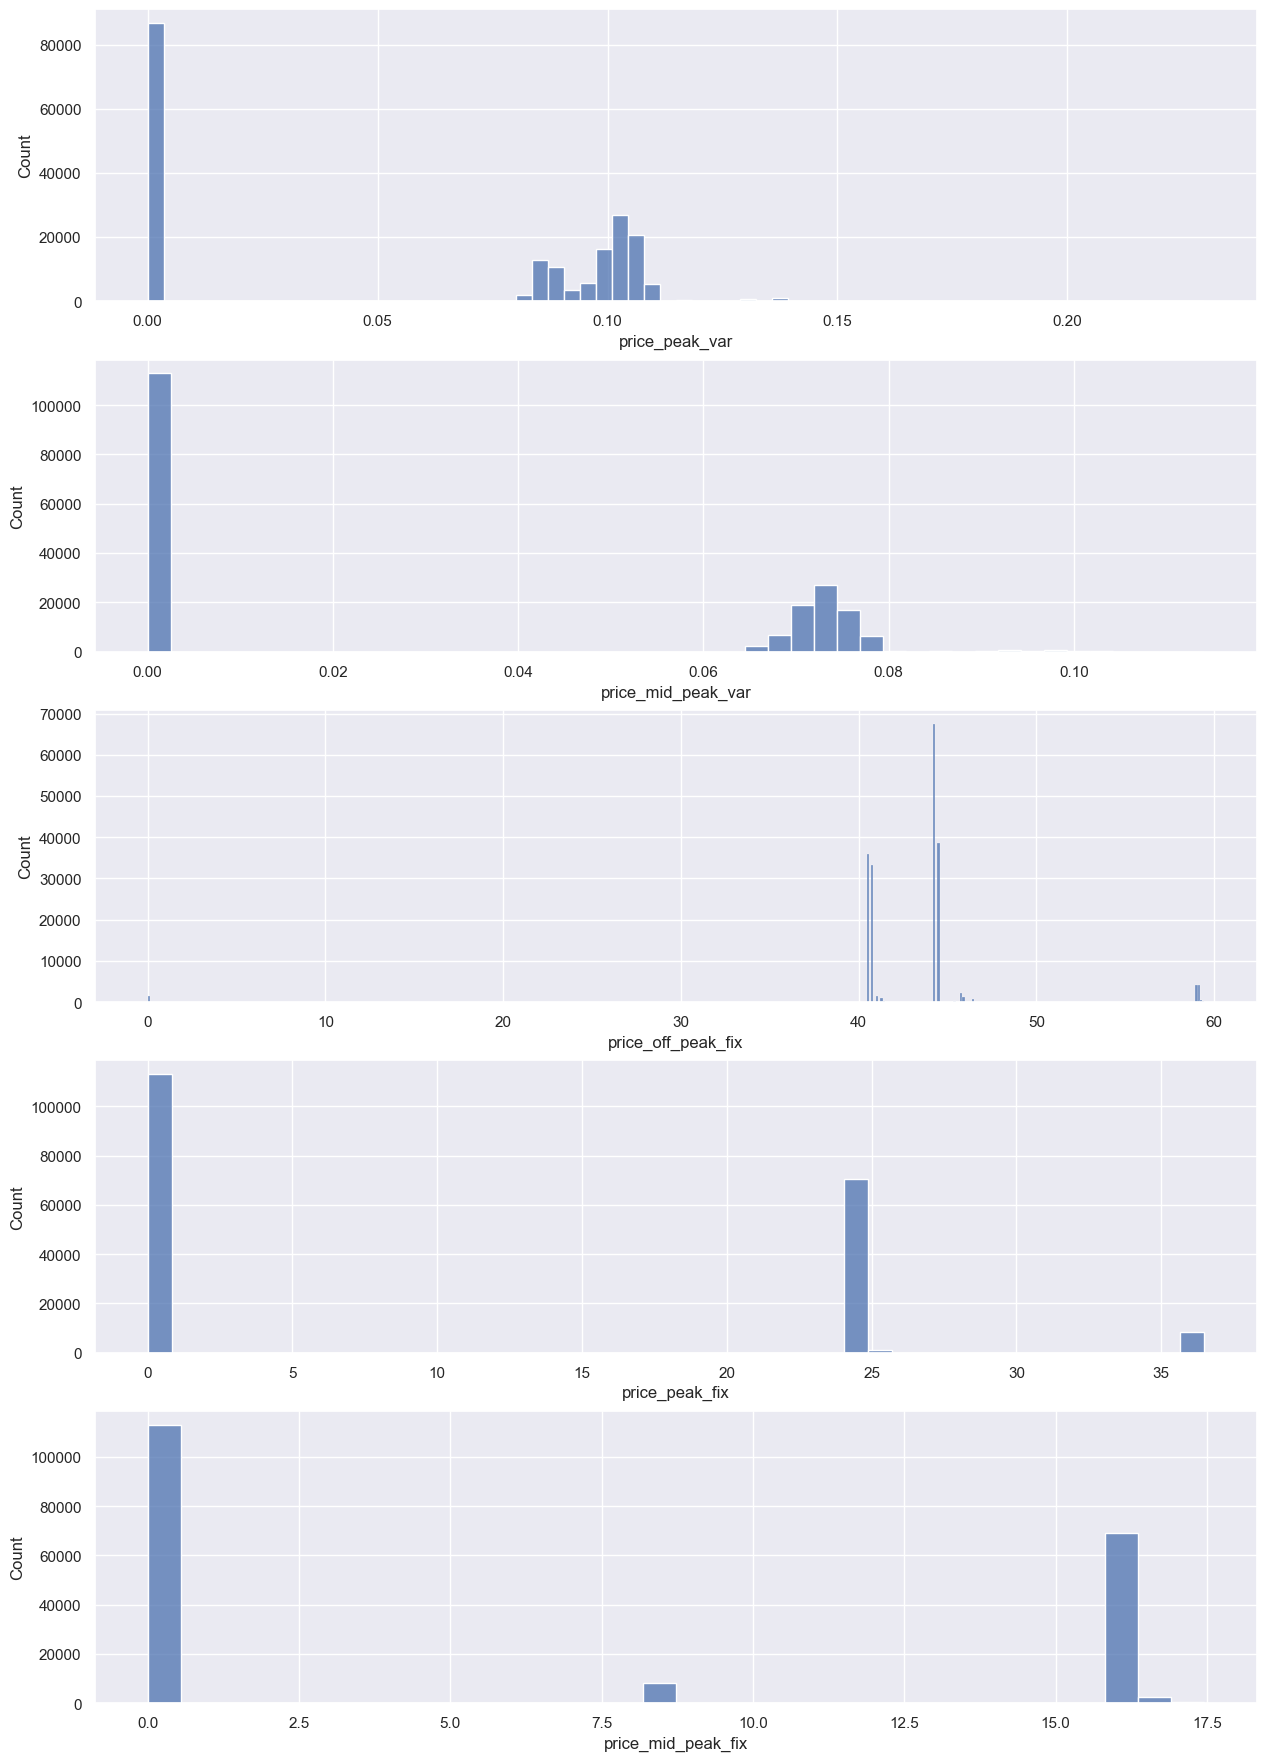

In [59]:
plt.figure(figsize=(15, 22))
selected_columns= ['price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
# Iterate through the selected columns and create histplots
for i, column in enumerate(selected_columns):
    plt.subplot(len(selected_columns), 1, i + 1)
    sns.histplot(pdf[column])
    plt.show;

In [104]:
cdf.shape

(14606, 24)

In [105]:
pdf.shape

(193002, 8)

In [107]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   price_date          8619 non-null    datetime64[ns]
 1   price_off_peak_var  8619 non-null    float64       
 2   price_peak_var      8619 non-null    float64       
 3   price_mid_peak_var  8619 non-null    float64       
 4   price_off_peak_fix  8619 non-null    float64       
 5   price_peak_fix      8619 non-null    float64       
 6   price_mid_peak_fix  8619 non-null    float64       
 7   id                  193002 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.3+ MB


In [108]:
pdf.head(2)

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,id
0,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,038af19179925da21a25619c5a24b745
1,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,038af19179925da21a25619c5a24b745


In [109]:
merged_df = pd.merge(cdf, pdf, on="id", how = "outer")

In [110]:
pd.set_option('display.max_columns', None)

In [111]:
merged_df.head(2)

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,24011ae4ebbe3035111d65fa7c15bc57,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,43.648,1.0,24011ae4ebbe3035111d65fa7c15bc57,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
merged_df.shape

(175149, 31)

In [ ]:
merged_df.duplicated().sum()

In [ ]:
merged_df.to_csv('cpdf_inner.csv', index = False)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
cpdf_inner= pd.read_csv('cpdf_inner.csv')

In [ ]:
cpdf_inner.shape

cpdf_inner.isnull().sum().sum()

cpdf_inner.dropna(axis=0, inplace= True)

cpdf_inner.isnull().sum().sum()

cpdf_inner.duplicated().sum()

cpdf_inner.shape

In [45]:
cdf.shape

(14606, 24)

In [76]:
cdf.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn'],
      dtype='object')

In [77]:
X= cdf.drop(["id"], axis=1)
y= cdf["id"]

In [81]:
cdf= pd.concat([X,y],axis=1)

In [82]:
X= pdf.drop(["id"], axis=1)
y= pdf["id"]

In [84]:
X.duplicated().sum()

184383

In [89]:
X.drop_duplicates(inplace = True)

In [90]:
X.duplicated().sum()

0

In [91]:
X.shape

(8619, 7)

In [92]:
pdf= pd.concat([X,y],axis=1)

In [93]:
pdf.shape

(193002, 8)